<a href="https://colab.research.google.com/github/DavideMichelon10/CV-DP-refresh/blob/main/2_tensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch torchvision

In [2]:
import torch
print(torch.__version__)

2.8.0+cu126


In [3]:
x = torch.tensor([[False],[2.1], [2]])
y = torch.tensor([1, 2])
print(x)
print(x.shape)

print(y)
print(y.shape)

tensor([[0.0000],
        [2.1000],
        [2.0000]])
torch.Size([3, 1])
tensor([1, 2])
torch.Size([2])


In [4]:
a = torch.zeros([3, 4])
b = torch.ones([3, 4])
c = torch.rand([3, 4])
print(a)
print(b)
print(c)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0.2437, 0.4425, 0.0838, 0.3664],
        [0.3467, 0.2239, 0.4181, 0.0513],
        [0.1151, 0.2547, 0.0798, 0.2556]])


In [5]:
x = torch.ones([3, 4])
print(x*10)

tensor([[10., 10., 10., 10.],
        [10., 10., 10., 10.],
        [10., 10., 10., 10.]])


In [6]:
x = torch.tensor([[1, 2], [3, 4], [5, 6]])
print(x), print(x.shape)
y = x.view(2,3)
y

tensor([[1, 2],
        [3, 4],
        [5, 6]])
torch.Size([3, 2])


tensor([[1, 2, 3],
        [4, 5, 6]])

In [7]:
x = torch.tensor([[1, 2], [2, 4]])

print(x), print(x.shape)
x = x.squeeze()
print(x), print(x.shape)
x = x[None, :, :, None, None]
print(x), print(x.shape)

tensor([[1, 2],
        [2, 4]])
torch.Size([2, 2])
tensor([[1, 2],
        [2, 4]])
torch.Size([2, 2])
tensor([[[[[1]],

          [[2]]],


         [[[2]],

          [[4]]]]])
torch.Size([1, 2, 2, 1, 1])


(None, None)

In [8]:
x = torch.tensor([[1, 2], [2, 45]])
y = torch.tensor([[1, 2], [2, 2]])
z =x@y
print(z)
print(z.max(dim=0))

tensor([[ 5,  6],
        [92, 94]])
torch.return_types.max(
values=tensor([92, 94]),
indices=tensor([1, 1]))


In [9]:
dir(torch.Tensor)

['H',
 'T',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__cuda_array_interface__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rd

## Calculate gradient

In [12]:
x = torch.tensor([[2., -1], [1, 1]], requires_grad=True)
print(x)
out = x.pow(2).sum()
out.backward()
print(x.grad)

tensor([[ 2., -1.],
        [ 1.,  1.]], requires_grad=True)
tensor([[ 4., -2.],
        [ 2.,  2.]])


## tensors over numpy arrays

In [15]:
import torch
x = torch.rand(1, 6400)
y = torch.rand(6400, 5000)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
x, y = x.to(device), y.to(device)
%timeit z=(x@y)

11.3 ms ± 510 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Build a NN

In [17]:
x = [[1,2], [3, 4], [5, 6], [7, 8]]
y = [[3], [7], [11], [15]]

x, y = torch.tensor(x).float(), torch.tensor(y).float()
X, Y = x.to(device), y.to(device)

In [33]:
import torch.nn as nn
torch.manual_seed(0)
class MyNeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.input_to_hidden = nn.Linear(2, 8)
    self.hidden_activation = nn.ReLU()
    self.hidden_to_output = nn.Linear(8,1)

  def forward(self, x):
    x = self.input_to_hidden(x)
    x = self.hidden_activation(x)
    x = self.hidden_to_output(x)
    return x

In [41]:
myNet = MyNeuralNet().to(device)

for p in myNet.parameters():
  print(p)

Parameter containing:
tensor([[-0.4214, -0.0154],
        [ 0.0297,  0.4558],
        [-0.5345, -0.4854],
        [-0.4106,  0.4949],
        [-0.2542,  0.5964],
        [ 0.2557,  0.0895],
        [-0.0053, -0.1398],
        [ 0.0887, -0.1615]], requires_grad=True)
Parameter containing:
tensor([-0.0050,  0.0902, -0.5531, -0.3706,  0.5710, -0.5739, -0.0508,  0.6995],
       requires_grad=True)
Parameter containing:
tensor([[ 0.1277,  0.0100, -0.3064,  0.1751, -0.2518, -0.1004, -0.1186, -0.0524]],
       requires_grad=True)
Parameter containing:
tensor([0.0039], requires_grad=True)


In [44]:
loss_func = nn.MSELoss()
myNet = MyNeuralNet().to(device)
_Y = myNet(X)
loss_value = loss_func(_Y, Y)
print(loss_value)


tensor(82.9755, grad_fn=<MseLossBackward0>)


In [47]:
from torch.optim import SGD
loss_func = nn.MSELoss()
myNet = MyNeuralNet().to(device)
opt = SGD(myNet.parameters(), lr = 0.001)
loss_history = []
for _ in range(50):
  opt.zero_grad()
  loss_value = loss_func(myNet(X), Y)
  loss_value.backward()
  opt.step()
  loss_history.append(loss_value.item())

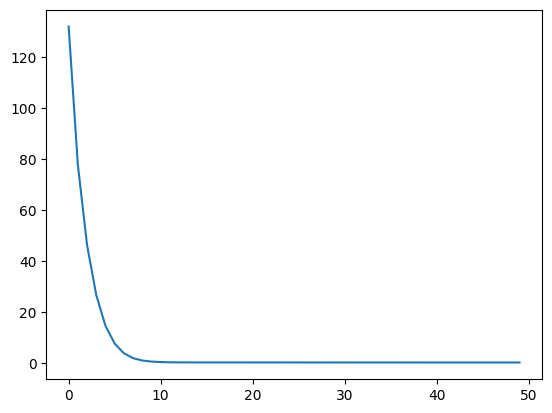

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)

In [52]:
test = torch.tensor([[1000.,3]])
print(myNet(test))

tensor([[967.6763]], grad_fn=<AddmmBackward0>)


## dataset

In [ ]:
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
